# BIG DATA JOBS

Learn all about the current state of the Big Data jobs offerings, in this case study we will focus on the Data Analyst role, but this dataset contains information about ML, Data Scientists, Data Engineers...

## DATA ANALYST:

Data analysis made with Python

## LOAD DATASET

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import csv, sqlite3
import pandas as pd


In [39]:
# Provide the file path of your CSV file
csv_file = "data_science_job.csv"

# Load the CSV file into a DataFrame with specified encoding
df = pd.read_csv(csv_file, encoding='latin-1')



In [40]:
df.head()

,company,job_title,location,job_type,experience_level,salary,requirements,facilities
0,SGS,ClinicalData Analyst,"Richardson, TX, United States",Full Time,Entry-level,48K,"Computer Science,Data quality,Genetics,Mathema...",",,,,"
1,Ocorian,AML/CFT &Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48K,"Agile,Data management,Finance,Security,,",",,,,"
2,Cricut,Machine Learning Engineer,"South Jordan, UT, United States",Full Time,NaN,90K,"Agile,Architecture,AWS,Computer Science,Comput...","Career development,,,,"
3,Bosch Group,Application Developer &Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48K,"Engineering,Industrial,Oracle,Power BI,R,R&D",",,,,"
4,Publicis Groupe,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108K,"AWS,Azure,Computer Science,Consulting,Dataflow...","Flex hours,Flex vacation,Parental leave,Unlimi..."


## CLEAN DATA

In [41]:
df.isnull().sum()

company               1
job_title             1
location              1
job_type              1
experience_level    236
salary              189
requirements          0
facilities            0
dtype: int64

In [42]:
df.duplicated().sum()

209

In [43]:
df.dropna(inplace = True)
df.drop_duplicates(inplace = True)

In [44]:
df = df.drop('facilities', axis=1)

In [45]:
df = df.drop('company', axis=1)

## QUICK LOOK

In [46]:
df.describe()

,job_title,location,job_type,experience_level,salary,requirements
count,2594,2594,2594,2594,2594,2594
unique,1839,969,2,4,165,2273
top,Data Engineer,United States,Full Time,Senior-level,115K,"Big Data,Business Intelligence,Data analysis,E..."
freq,163,290,2590,1693,246,6


## 1. TOP 10 JOBS

In [47]:
top_10 = df['job_title'].value_counts().head(10)
top_10

job_title
Data Engineer                    163
Data Analyst                     128
Data Scientist                    75
Machine Learning Engineer         62
Senior Data Scientist             32
Analytics Engineer                15
Senior Analytics Engineer         11
Data Architect                    11
Business Intelligence Analyst     10
Lead Data Engineer                 7
Name: count, dtype: int64

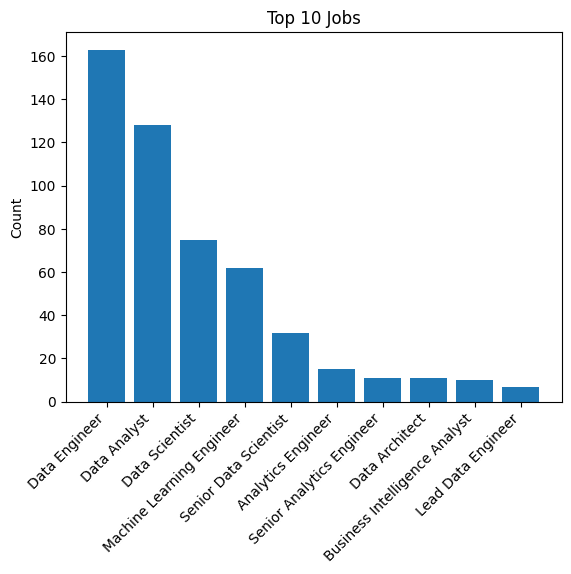

In [48]:
top_10 = df['job_title'].value_counts().head(10)

# Create a bar chart
plt.bar(top_10.index, top_10.values)

# Customize the plot
plt.xlabel('')
plt.ylabel('Count')
plt.title('Top 10 Jobs')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

## 2. TOP 10 COUNTRIES

In [49]:
top_loca = df['location'].value_counts().head(10)
top_loca

location
United States                 290
United Kingdom                106
India                          96
Remote                         51
Paris, France                  48
Berlin, Germany                31
Bangkok                        17
Spain                          16
Johannesburg, South Africa     13
Sydney, Australia              12
Name: count, dtype: int64

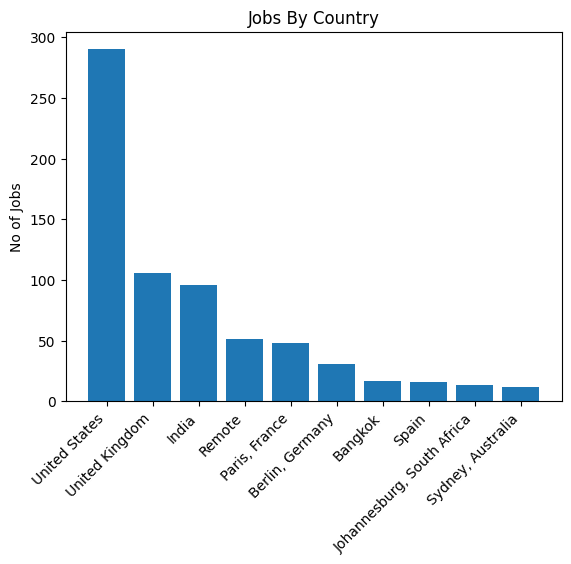

In [50]:
# Create a bar chart
plt.bar(top_loca.index, top_loca.values)

# Customize the plot
plt.xlabel('')
plt.ylabel('No of Jobs')
plt.title('Jobs By Country')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

## 3. DATA ANALYSTS DEMAND PER COUNTRY

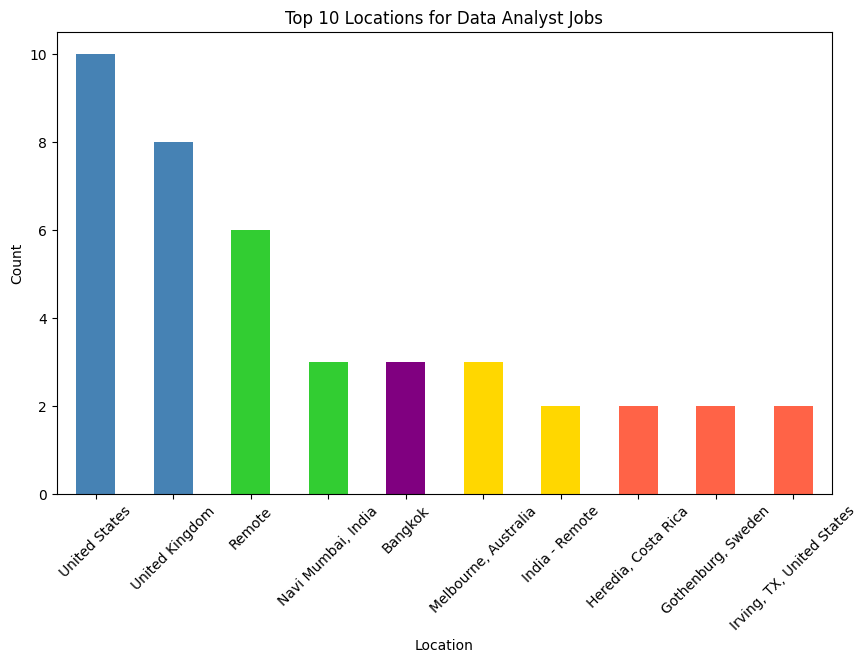

In [51]:
# Assuming your DataFrame is named 'df'

# Step 1: Filter rows with job_title = 'Data Analyst' (case-insensitive)
filtered_df = df[df['job_title'].str.lower() == 'data analyst'.lower()]

# Step 2: Group by 'location' and count occurrences
location_counts = filtered_df.groupby('location').size()

# Step 3: Sort locations in descending order
sorted_locations = location_counts.sort_values(ascending=False)

# Step 4: Select top 10 locations
top_10_locations = sorted_locations.head(10)

# Create the bar chart with custom colors
colors = ['steelblue', 'steelblue', 'limegreen', 'limegreen', 'purple',
          'gold', 'gold', 'tomato', 'tomato', 'tomato']

plt.figure(figsize=(10, 6))
top_10_locations.plot(kind='bar', color=colors)
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Top 10 Locations for Data Analyst Jobs')
plt.xticks(rotation=45)

plt.show()

In [52]:
top_10_locations

location
United States                10
United Kingdom                8
Remote                        6
Navi Mumbai, India            3
Bangkok                       3
Melbourne, Australia          3
India - Remote                2
Heredia, Costa Rica           2
Gothenburg, Sweden            2
Irving, TX, United States     2
dtype: int64

## 4. TOP REQUIREMENTS

In [53]:
df.columns

Index(['job_title', 'location', 'job_type', 'experience_level', 'salary',
       'requirements'],
      dtype='object')

In [54]:
# Combine all elements in the 'requirements' column into a single string
combined_requirements = ','.join(df['requirements'])

# Split the combined string on commas to extract individual elements
all_elements = combined_requirements.split(',')

# Use value_counts() to count the frequency of each unique element
top_elements = pd.Series(all_elements).value_counts().head(30)

top_elements

# Split the 'requirements' column on commas to extract individual elements
#all_elements = df['requirements'].str.split(',')

# Flatten the list of elements into a single list
#all_elements_flat = [element for sublist in all_elements for element in sublist]

# Use value_counts() to count the frequency of each unique element
#top_5_elements = pd.Series(all_elements_flat).value_counts().head(5)

#print("Top 5 most repeated individual elements:")
#print(top_5_elements)

Computer Science         946
Engineering              857
AWS                      739
Architecture             668
                         623
Agile                    498
Big Data                 484
Data analysis            473
Azure                    452
Machine Learning         413
Business Intelligence    375
APIs                     322
Data Analytics           321
Excel                    279
Data pipelines           264
Airflow                  258
Consulting               249
Data visualization       239
Deep Learning            233
Python                   232
Data management          218
Data quality             214
Finance                  185
BigQuery                 175
CI/CD                    169
Data Mining              162
ETL                      158
Economics                153
Databricks               150
Computer Vision          149
Name: count, dtype: int64

In [55]:
top_elements = top_elements.drop(top_elements.index[3])

top_elements

Computer Science         946
Engineering              857
AWS                      739
                         623
Agile                    498
Big Data                 484
Data analysis            473
Azure                    452
Machine Learning         413
Business Intelligence    375
APIs                     322
Data Analytics           321
Excel                    279
Data pipelines           264
Airflow                  258
Consulting               249
Data visualization       239
Deep Learning            233
Python                   232
Data management          218
Data quality             214
Finance                  185
BigQuery                 175
CI/CD                    169
Data Mining              162
ETL                      158
Economics                153
Databricks               150
Computer Vision          149
Name: count, dtype: int64

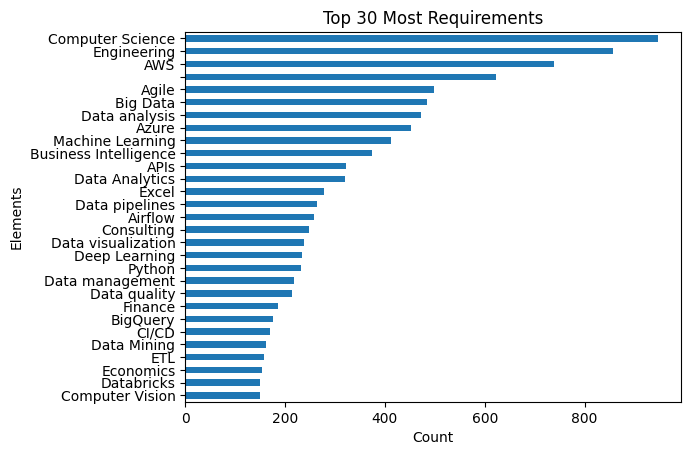

In [56]:
# Sort the top_elements in descending order
top_elements_sorted = top_elements.sort_values(ascending=True)

# Plot the column chart
top_elements_sorted.plot(kind='barh')

# Set the labels and title
plt.xlabel('Count')
plt.ylabel('Elements')
plt.title('Top 30 Most Requirements')

# Display the plot
plt.show()

## 5. DATA ANALYST MOST DESIRED SKILL

In [57]:
# Making it ready for the datavisualization tool

python = df[df['requirements'].str.contains('python', case=False)]

In [58]:
sql = df[df['requirements'].str.contains('sql', case=False)]

In [59]:
ex = df[df['requirements'].str.contains('Excel', case=False)]

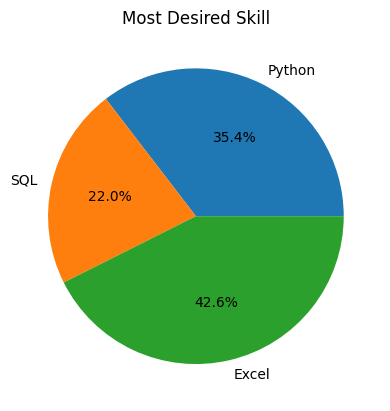

In [60]:
# Get the counts
python_count = len(python)
sql_count = len(sql)
excel_count = len(ex)

# Create a pie chart
labels = ['Python', 'SQL', 'Excel']
counts = [python_count, sql_count, excel_count]

plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Most Desired Skill')

plt.show()

## 6. TABLEAU VS POWER BI

In [61]:
tb = df[df['requirements'].str.contains('tableau', case=False)]

In [62]:
pb = df[df['requirements'].str.contains('power bi', case=False)]

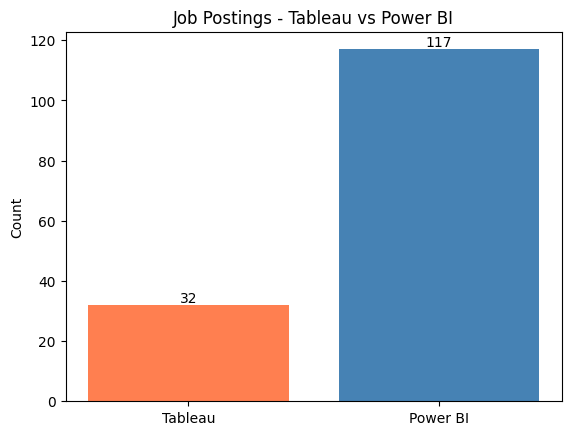

In [63]:
# Get the counts
tableau_count = len(tb)
power_bi_count = len(pb)

# Create a bar plot
labels = ['Tableau', 'Power BI']
counts = [tableau_count, power_bi_count]

# Define colors for the bars
colors = ['coral', 'steelblue']

plt.bar(labels, counts, color=colors)
plt.xlabel('')
plt.ylabel('Count')
plt.title('Job Postings - Tableau vs Power BI')

for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

## 7. IS THERE A CORRELATION BETWEEN SALARIES AND JOBS?

In [64]:
df['salary'] = df['salary'].str.replace('K','000')

In [65]:
df.dtypes

job_title           object
location            object
job_type            object
experience_level    object
salary              object
requirements        object
dtype: object

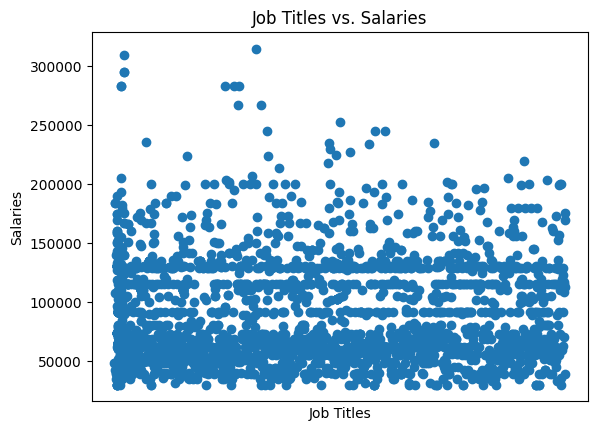

In [66]:
# Convert 'salary' column to numeric, with errors='coerce'
df['salary'] = pd.to_numeric(df['salary'])

# Remove rows with non-numeric 'salary' values
df = df.dropna(subset=['salary'])

# Create scatter plot
plt.scatter(df['job_title'], df['salary'])

# Customize plot
plt.title('Job Titles vs. Salaries')
plt.xlabel('Job Titles')
plt.ylabel('Salaries')

# Remove X legend
plt.xticks([])

# Display the plot
plt.show()

## 8. LEVELS DEMANDED COMPARISON 

In [67]:
# Create a new DataFrame with the count of experience levels
experience_counts = df['experience_level'].value_counts().reset_index()

# Rename the columns
experience_counts.columns = ['Experience Level', 'Count']

# Display the new DataFrame
experience_counts

,Experience Level,Count
0,Senior-level,1693
1,Mid-level,433
2,Entry-level,351
3,Executive-level,117


## 9. DATA JOBS WITH THE HIGHEST SALARIES

In [68]:
# Group the DataFrame by 'job_title' and get the 10 highest salaries for each group
top_salaries = df.groupby('job_title')['salary'].nlargest(10).reset_index()

# Sort the DataFrame in descending order by salary
top_salaries = top_salaries.sort_values(by='salary', ascending=False)

# Display the resulting DataFrame
top_salaries.head(10)

,job_title,level_1,salary
1972,"Senior/Principal ML Engineer, Content Understa...",868,315000
852,Data Scientist,789,310000
853,Data Scientist,688,295000
854,Data Scientist,785,295000
600,Data Engineer,732,283000
1433,Principal Deep Learning Engineer - Computer Vi...,744,283000
1455,"Principal Software Engineer, Applied ML",665,283000
599,Data Engineer,596,283000
1449,Principal Machine Learning Engineer - Personal...,720,283000
1269,Machine Learning Engineer - Search,904,267000


## 10. THE HIGHEST SALARY FOR A DATA ANALYST

In [69]:
# Filter the DataFrame for 'Data Analyst' job title
data_analyst_salaries = df[df['job_title'] == 'Data Analyst']

# Get the top 5 highest salaries for Data Analyst
top_data_analyst_salaries = data_analyst_salaries.nlargest(3, 'salary')[['job_title', 'salary']]

# Display the top 5 highest salaries for Data Analyst
top_data_analyst_salaries

,job_title,salary
799,Data Analyst,153000
2414,Data Analyst,142000
1888,Data Analyst,140000


## LAST ARRANGEMENTS FOR DATA VISUALIZATION TOOL 

In [70]:
# Making it ready for the datavisualization tool

df['excel'] = df['requirements'].apply(lambda x: 'yes' if 'Excel' in x.lower() else 'no')

df['tableau'] = df['requirements'].apply(lambda x: 'yes' if 'tableau' in x.lower() else 'no')

df['power_bi'] = df['requirements'].apply(lambda x: 'yes' if 'power bi' in x.lower() else 'no')

df['sql'] = df['requirements'].apply(lambda x: 'yes' if 'sql' in x.lower() else 'no')

df['python'] = df['requirements'].apply(lambda x: 'yes' if 'python' in x.lower() else 'no')

In [71]:
df

,job_title,location,job_type,experience_level,salary,requirements,excel,tableau,power_bi,sql,python
0,ClinicalData Analyst,"Richardson, TX, United States",Full Time,Entry-level,48000,"Computer Science,Data quality,Genetics,Mathema...",no,no,no,no,no
1,AML/CFT &Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48000,"Agile,Data management,Finance,Security,,",no,no,no,no,no
3,Application Developer &Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48000,"Engineering,Industrial,Oracle,Power BI,R,R&D",no,no,yes,no,no
4,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108000,"AWS,Azure,Computer Science,Consulting,Dataflow...",no,no,no,no,no
5,Staff Data Scientist - ATG,"Kirkland, Washington, United States",Full Time,Senior-level,184000,"Computer Science,Deep Learning,Industrial,Mach...",no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...
3191,"Associate Director, Data Science",United States,Full Time,Mid-level,106000,"Bayesian,Classification,Clustering,Data analys...",no,no,no,no,no
3192,"Senior Software Engineer, Machine Learning - A...","Sunnyvale, CA; United States; United States",Full Time,Senior-level,176000,"Computer Science,Data analysis,Engineering,Exc...",no,no,no,no,no
3193,Data Scientist - New College Graduate,"Biñan, Philippines",Full Time,Entry-level,39000,"APIs,Clustering,Computer Science,Data visualiz...",no,no,no,no,no
3196,Data Scientist,"Edmonton, Alberta, Canada",Full Time,Entry-level,39000,"Computer Science,Data Analyst,Data Mining,Econ...",no,no,no,no,no


## SAVING IT TO A NEW CSV FILE

In [72]:
df.to_csv('BigDataJobs.csv', index=False)


## USING PYTHON AS A SQL QUERY

In [73]:
# Filter the DataFrame based on the conditions
filtered_df = df[(df['python'] == 'yes') &
                 (df['sql'] == 'yes') &
                 (df['excel'] == 'no') &
                 (df['power_bi'] == 'yes') &
                 (df['salary'] > 50000.0)]

# Retrieve the job titles and salaries from the filtered DataFrame
job_titles = filtered_df[['job_title', 'salary']]

# Sort the job titles in descending order by salary
sorted_job_titles = job_titles.sort_values(by='salary', ascending=False)

# Display the resulting job titles
sorted_job_titles

,job_title,salary
1278,Senior VehicleData Analyst,92000
1175,Data Analyst - Contract - 1 day a week,65000
1892,[RPG] Power BI Data Engineer,62000
2051,Power BI Data Engineer,62000
1467,Ingéni Data / Power BI (H/F),60000
726,302 - Data Analyst Specialist - CMS End Stage ...,56000
2066,Power BI Developer,56000
